# Analyzing the geothermal results
I have reduced all the simulation results to a single data file of the recovery factors and CO2 emission. In this notebook, I'm going to analyze the data.

In [1]:
using Dierckx, DataFrames, PyPlot

In [2]:
df_geo = readtable("geothermal_final_results.csv")

,q_m3_s,k_m2,L_m,t_life_s,R_th,R_pr,R_ze,c_CO2,COP,c_CO2_heat
1,0.013888888888888888,2.0e-14,500.0,1.0576335144873849e9,-0.3109192087334036,-3.7883184936699945,-5.077606079429243,0.2865083523909441,1.6459918591020446,0.03341450305228407
2,0.013888888888888888,2.0e-14,650.0,1.4291956059324093e9,-0.4171418544683885,-4.2142974097433425,-5.620729197422762,0.3125403972620931,1.506482033476301,0.036508898730829256
3,0.013888888888888888,2.0e-14,800.0,1.7765941755595894e9,-0.5235231906527951,-4.636011430730794,-6.158414574181762,0.3383118096557706,1.3895068176525533,0.0395823894501774
4,0.013888888888888888,2.0e-14,900.0,2.028329490159246e9,-0.6034100843091478,-4.951108126288355,-6.560162861017654,0.35756771882873284,1.3148764857132726,0.041829023940727406
5,0.013888888888888888,2.0e-14,1000.0,2.255901282941059e9,-0.6767241870505757,-5.239711644024146,-6.928132346130786,0.3752046004681422,1.2523011627065508,0.04391914791577019
6,0.013888888888888888,5.0e-14,500.0,1.0576335144873849e9,0.38847613288727284,-1.0563054404640468,-1.5942894365916598,0.11955199913946951,3.944646839830814,0.013942946538240407
7,0.013888888888888888,5.0e-14,650.0,1.4291956059324093e9,0.35212369091246043,-1.2093538730993671,-1.7894261882016933,0.128904958911628,3.6525863487830392,0.015057823347098905
8,0.013888888888888888,5.0e-14,800.0,1.7765941755595894e9,0.3130415259375661,-1.368180506549535,-1.9919301458506569,0.1386110309558049,3.3914080486119396,0.01621745281359192
9,0.013888888888888888,5.0e-14,900.0,2.028329490159246e9,0.2827322504417292,-1.4896146311677931,-2.1467586547389366,0.14603200523803178,3.219550294959021,0.017083131170870573
10,0.013888888888888888,5.0e-14,1000.0,2.255901282941059e9,0.25465926444480214,-1.6014950366203886,-2.2894061716909953,0.15286914112680153,3.0736691130420573,0.017893923508755846


# Sensitivity analysis

## Step 1
Find a list of permeability, well-spacing, and flow rates

In [3]:
flow_rates = df_geo[:q_m3_s] # [m^3/s]
k          = df_geo[:k_m2]   # [m^2]
L          = df_geo[:L_m]    # [m]
flow_range = union(flow_rates)
k_range    = union(k)
L_range    = union(L)

5-element Array{Float64,1}:
  500.0
  650.0
  800.0
  900.0
 1000.0

## Step 2
For a fixed value of well spacing, plot the effect of perm for different flow rates, and see if the results look good:
### Effect of permeability

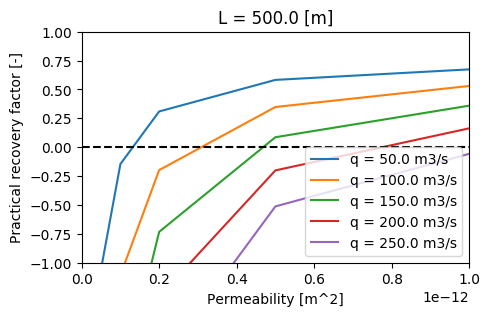

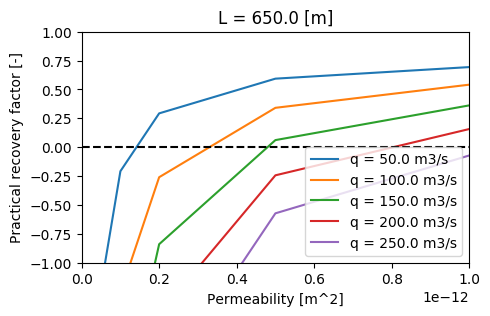

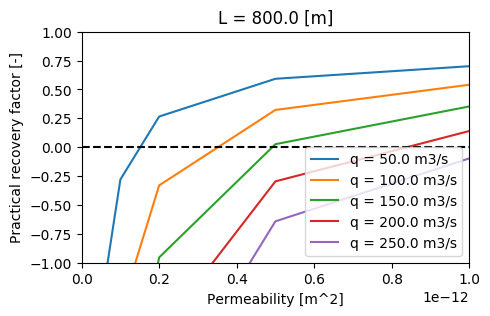

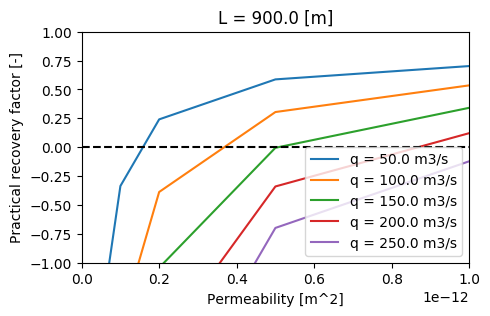

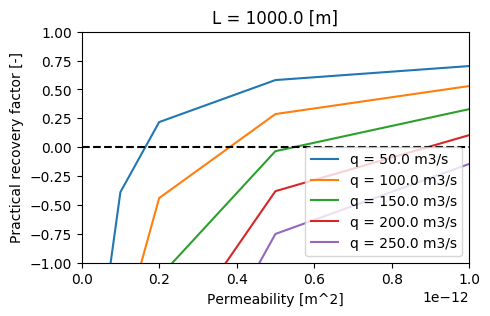

In [4]:
for L_well in L_range
    figure(figsize=(5,3))
    xlabel("Permeability [m^2]")
    ylabel("Practical recovery factor [-]")
    for q in flow_range
        df_temp = df_geo[(df_geo[:q_m3_s].==q) & (df_geo[:L_m].==L_well), :]
        plot(df_temp[:k_m2], df_temp[:R_pr], label = "q = $(q*3600) m3/s")
    end
    legend()
    plot([0, 1e-12], [0,0], "--k")
    axis([0, 1e-12, -1,1])
    title("L = $L_well [m]")
end

### Effect of flow rate
Change the flow rate in different well spacing in different reservoirs

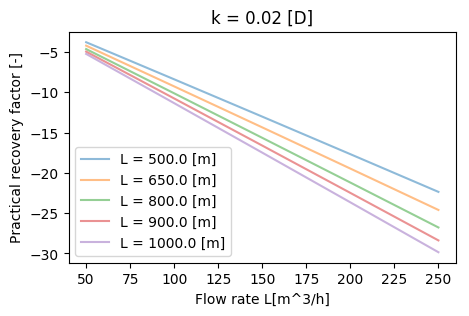

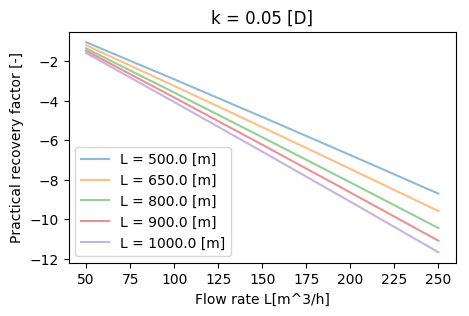

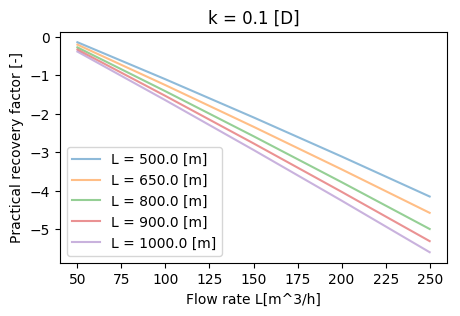

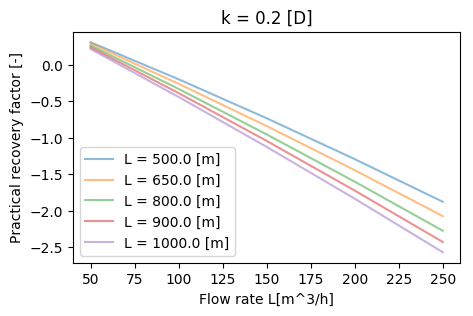

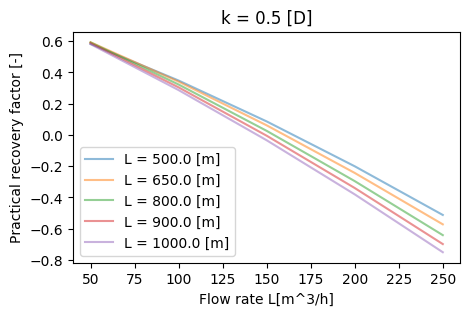

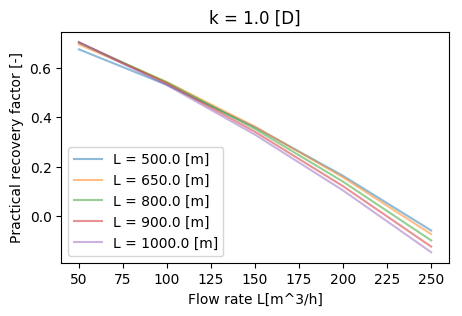

In [5]:
for k_res in k_range
    figure(figsize=(5,3))
    xlabel("Flow rate \L[m^3/h]")
    ylabel("Practical recovery factor [-]")
    for L_well in L_range
        df_temp = df_geo[(df_geo[:k_m2].==k_res) & (df_geo[:L_m].==L_well), :]
        plot(df_temp[:q_m3_s]*3600, df_temp[:R_pr], alpha = 0.5, label = "L = $L_well [m]")
    end
    legend()
    #plot([0, 1e-12], [0,0], "--k")
    #axis([0, 1e-12, -1,1])
    title("k = $(k_res*1e12) [D]")
end

### Effect of flow rate on the project life time
Conclusion: project life time does not depend on the permeability of the reservoir. It is important for the project to have an acceptable lifetime to justify the capital investments.

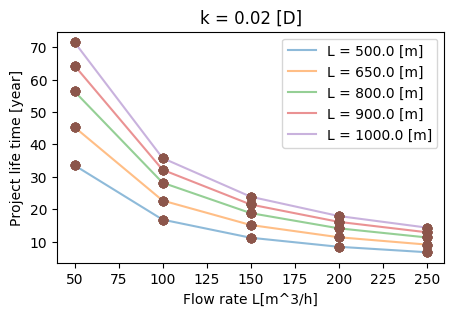

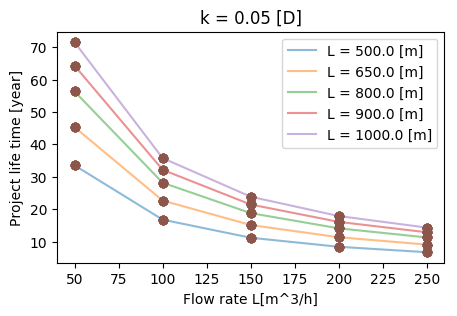

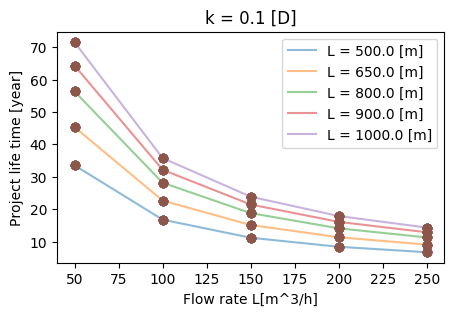

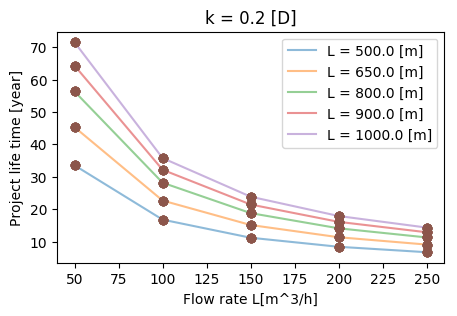

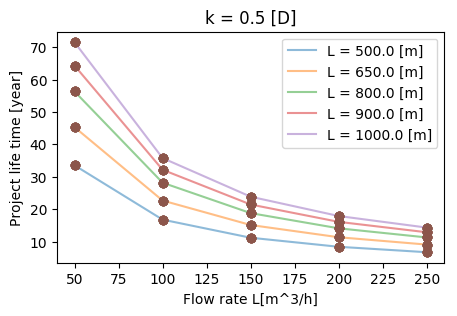

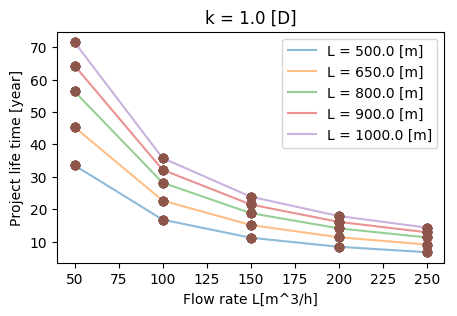

In [6]:
for k_res in k_range
    figure(figsize=(5,3))
    xlabel("Flow rate \L[m^3/h]")
    ylabel("Project life time [year]")
    for L_well in L_range
        df_temp = df_geo[(df_geo[:k_m2].==k_res) & (df_geo[:L_m].==L_well), :]
        plot(df_temp[:q_m3_s]*3600, df_temp[:t_life_s]/(3600*24*365), alpha = 0.5, label = "L = $L_well [m]")
    end
    legend()
    #plot([0, 1e-12], [0,0], "--k")
    #axis([0, 1e-12, -1,1])
    plot(df_geo[:q_m3_s]*3600, df_geo[:t_life_s]/(3600*24*365), "o")
    title("k = $(k_res*1e12) [D]")
end

### CO2 emission:

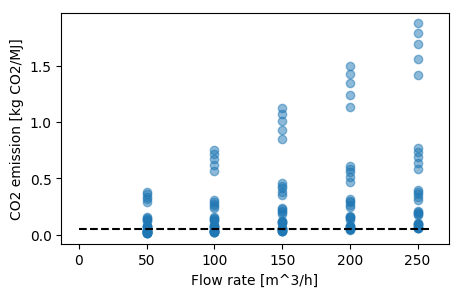

PyObject <matplotlib.text.Text object at 0x7f3a6017cbd0>

In [7]:
figure(figsize=(5,3))
plot(df_geo[:q_m3_s]*3600, df_geo[:c_CO2], alpha = 0.5, "o")
plot([0, 260], [0.05, 0.05], "--k")
xlabel("Flow rate [m^3/h]")
ylabel("CO2 emission [kg CO2/MJ]")